# Investigate a Dataset: Titanic

This notebook is a project from [Udacity's Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). The notebook uses a [7-stage data science solutions workflow](https://leanpub.com/data-science-solutions) to investigate, analyze, and report [the Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic).

## Project workflow

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.


## 1. Question and problem definition

    What factors made people more likely to survive?

## 2.  Acquire training and testing data

Here I use the CSV files from the Kaggle website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Wrangle, prepare, cleanse the data

The following is a data overview from the [Kaggle website](https://www.kaggle.com/c/titanic/data).

### Data Dictionary

|Variable	|Definition	                                    |Key                                         |
|-----------|:---------------------------------------------:|--------------------------------------------|                              
|survival	|Survival	                                    |0 = No, 1 = Yes|
|pclass	    |Ticket class	                                |1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	    |Sex	| |
|Age	    |Age in years	| |
|sibsp	    |# of siblings / spouses aboard the Titanic	| |
|parch	    |# of parents / children aboard the Titanic	| |
|ticket	    |Ticket number	||
|fare	    |Passenger fare	||
|cabin	    |Cabin number	||
|embarked	|Port of Embarkation	                        |C = Cherbourg, Q = Queenstown, S = Southampton|


### Variable Notes

**pclass**: A proxy for socio-economic status (SES)

    1st = Upper
    2nd = Middle
    3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

Use the `pandas.info()` to check the data types:

In [4]:
print("Training dataset:")
train_df.info()
print("-"*40)
print("Testing dataset:")
test_df.info()

Training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
Testing dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-nul

**Categorical features:** Name, Sex, Ticket, Cabin, Embarked, Pclass (coded in numerical)

**Numerical features:** Age, SibSp, Parch, Fare

**Features contain missing values in the training dataset:** Age, Cabin, Embarked 

### Descriptive statistics for the training dataset

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`Survived` and `Pclass` are actually not numerical data. Here we can use the descriptive values to check if there's any outliers from the max and min.

### Convert the categorical variables into dummy variables for modeling

Create sets of dummy variables from the variables `Sex` and `Embarked`. `Pclass` is Ordinal data, so we keep it as the coded it has instead of converting into dummy variables.

In [6]:
# Create sets of dummy variables from the variables Sex and Embarked
df_sex = pd.get_dummies(train_df['Sex'])
df_embarked = pd.get_dummies(train_df.Embarked)

### Feature engineering

Extract the title from the names. Reduce the names all to Mrs, Miss, Mr, and Master. Referencing from this [helpful blog post](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/).

In [7]:
def title_in_name(name, titles):
    for title in titles:
        if name.find(title) != -1:
            return title
    return np.nan

In [8]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

train_df["Title"] = train_df.Name.map(lambda x: title_in_name(x, title_list))

In [9]:
# Replace all titles with Mr, Mrs, Miss, Master
def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
train_df['Title'] = train_df.apply(replace_titles, axis=1)

In [10]:
# Convert title into dummy variables
df_title = pd.get_dummies(train_df.Title)

Add a new feature `Family_size`, see if people traveling alone have higher chance to survive. Maybe people who had a family might look for them, or even sacrificed a space to them in a lifeboat.

In [11]:
train_df['Family_size'] = train_df.SibSp + train_df.Parch

Convert `Cabin` into two categories, 1=is cabin crew, 0=is not cabin crew.

In [12]:
train_df['cabin_crew'] = train_df.Cabin.apply(lambda x: 0 if type(x) is float else 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,cabin_crew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


Combine the dataset with the dummy variables:

In [13]:
train_df = pd.concat([train_df, df_sex, df_embarked, df_title], axis=1)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_crew,female,male,C,Q,S,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,0,1,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,1,0,0,1,0


**Distribution of categorical features:**

* Names are unique across the dataset
* Sex are two variables with 65% male
* There are 681 kinds of unique Tickets, it is not a good idea to make it into a dummy variable
* There are 204 Cabin crews with 147 different positions
* Three ports for embarkation, most of the people embarked from S (Southampton)
* 4 unique Titles with 60% Mr.

In [15]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,204,889,891
unique,891,2,681,147,3,4
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S,Mr
freq,1,577,7,4,644,531


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
Family_size    891 non-null int64
cabin_crew     891 non-null int64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
Master         891 non-null uint8
Miss           891 non-null uint8
Mr             891 non-null uint8
Mrs            891 non-null uint8
dtypes: float64(2), int64(7), object(6), uint8(9)
memory usage: 112.3

Also do the same feature engineering to the testing dataset:

In [17]:
# Create sets of dummy variables from the variables Sex and Embarked
df_sex2 = pd.get_dummies(test_df.Sex)
df_embarked2 = pd.get_dummies(test_df.Embarked)
test_df["Title"] = test_df.Name.map(lambda x: title_in_name(x, title_list))
test_df['Title'] = test_df.apply(replace_titles, axis=1)
df_title2 = pd.get_dummies(test_df.Title)
test_df['Family_size'] = test_df.SibSp + test_df.Parch
test_df['cabin_crew'] = test_df.Cabin.apply(lambda x: 0 if type(x) is float else 1)
test_df = pd.concat([test_df, df_sex2, df_embarked2, df_title2], axis=1)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,cabin_crew,female,male,C,Q,S,Master,Miss,Mr,Mrs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,0,1,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,0,0,0,1,0,0,0,1


## 4. Analyze, identify patterns, and explore the data.

People on the *upper class* had the highest survival rate:

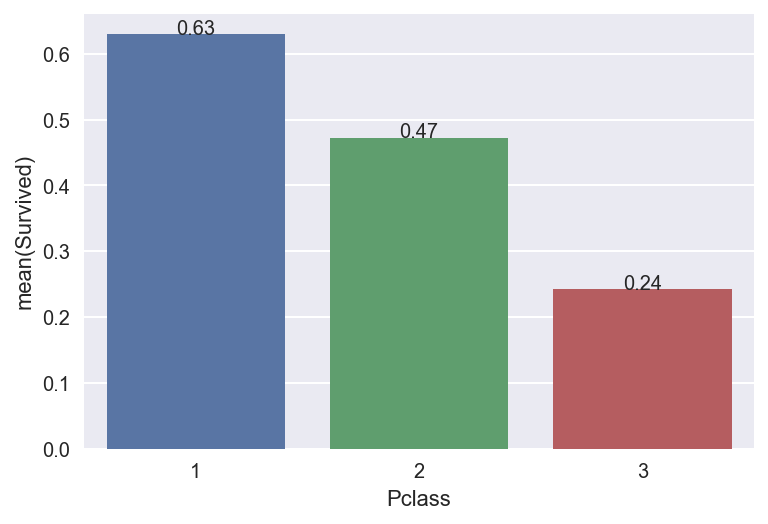

In [18]:
survived_pclass = train_df[["Pclass","Survived"]].groupby("Pclass", as_index=False).mean()
ax = sns.barplot(x="Pclass", y="Survived", data=survived_pclass)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 

Women's survival rate is a lot higher than men:

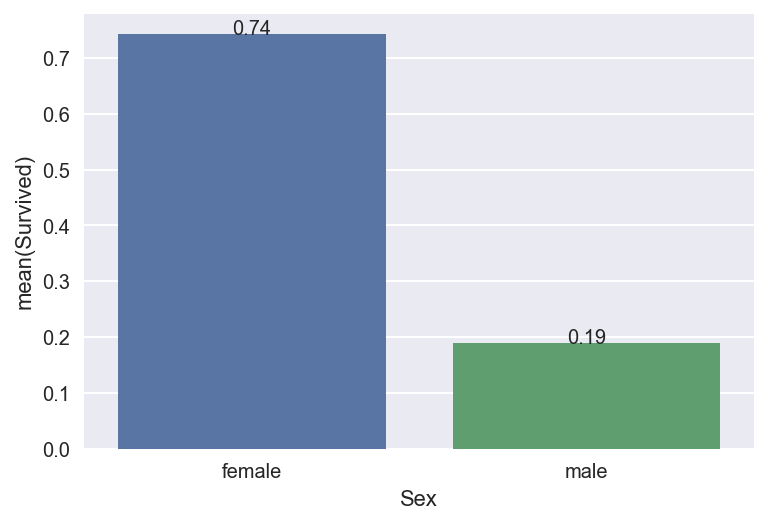

In [19]:
survived_sex = train_df[["Sex","Survived"]].groupby("Sex", as_index=False).mean()
ax = sns.barplot(x="Sex", y="Survived", data=survived_sex)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 

Here, I use a two-proportion z-test to see if there is a significant difference between the survival rate of male and female:

In [93]:
from statsmodels.stats.proportion import proportions_ztest
total_male_count = train_df.Sex.value_counts()[0]
total_female_count = train_df.Sex.value_counts()[1]
survived_male_count = train_df.loc[train_df["Survived"] == 1]["Sex"].value_counts()[1]
survived_female_count = train_df.loc[train_df["Survived"] == 1]["Sex"].value_counts()[0]
counts = np.array([survived_male_count, survived_female_count])
nobs = np.array([total_male_count, total_female_count])

stat, pval = proportions_ztest(counts, nobs)
print "P-value: ", pval
# print '{0:0.3f}'.format(pval)

P-value:  3.71174777011e-59


From the two-proportion z-test, we can conclude that the survival rates between two groups are significantly different.

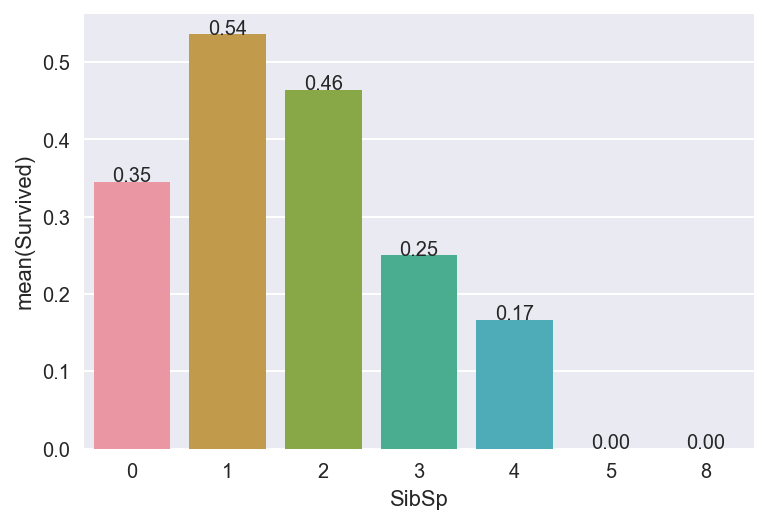

In [20]:
survived_sibsp = train_df[["SibSp","Survived"]].groupby("SibSp", as_index=False).mean()
ax = sns.barplot(x="SibSp", y="Survived", data=survived_sibsp)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 

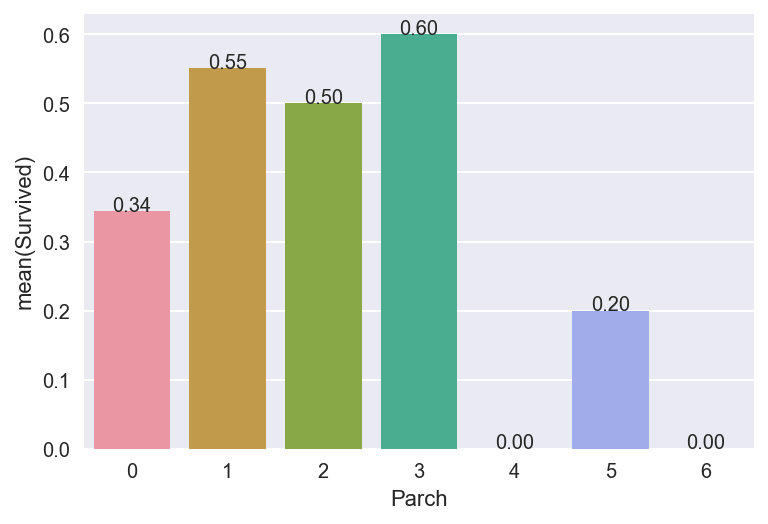

In [21]:
survived_parch = train_df[["Parch","Survived"]].groupby("Parch", as_index=False).mean()
ax = sns.barplot(x="Parch", y="Survived", data=survived_parch)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 

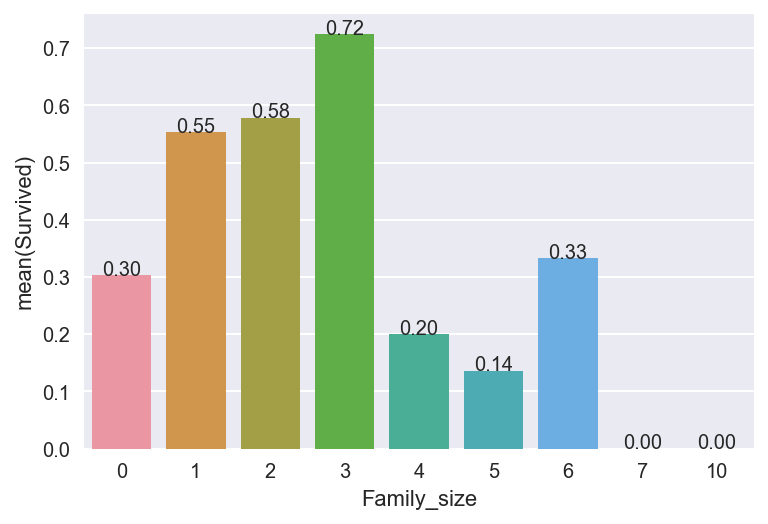

In [22]:
survived_family = train_df[["Family_size","Survived"]].groupby("Family_size", as_index=False).mean()
ax = sns.barplot(x="Family_size", y="Survived", data=survived_family)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 

The people who were survived are slightly youger than those who did not survive, this might because they let women and children to load on the lifeboat first. The overall age lies inbetween 20-38.

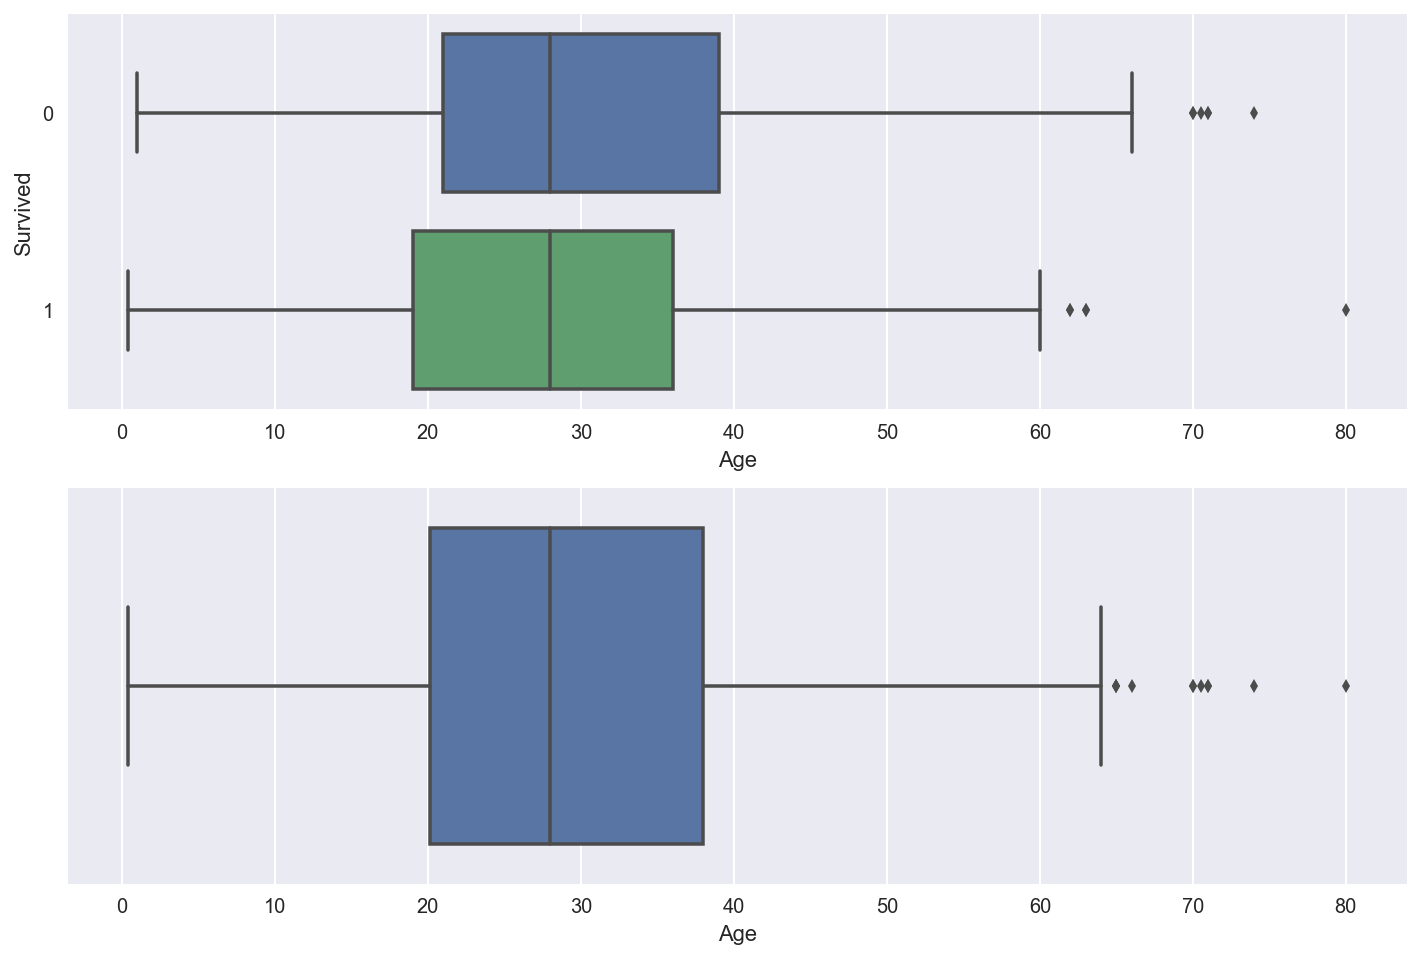

In [23]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
sns.boxplot(y="Survived", x="Age", data=train_df, orient="h")

# share x only
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x="Age", data=train_df, orient="h")

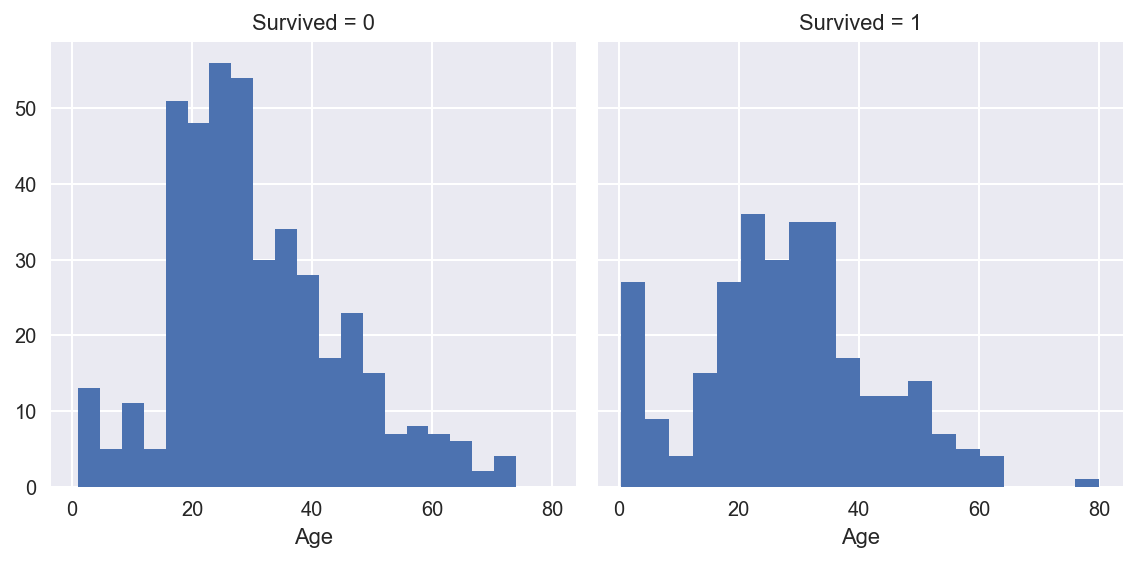

In [24]:
g = sns.FacetGrid(train_df, col='Survived', size=4)
g.map(plt.hist, 'Age', bins=20)

**Correlating numerical (age) and ordinal (Pclass) features**
* Most people were in Pclass=3, but most of them did not survive
* Most people in Pclass=1 did survive

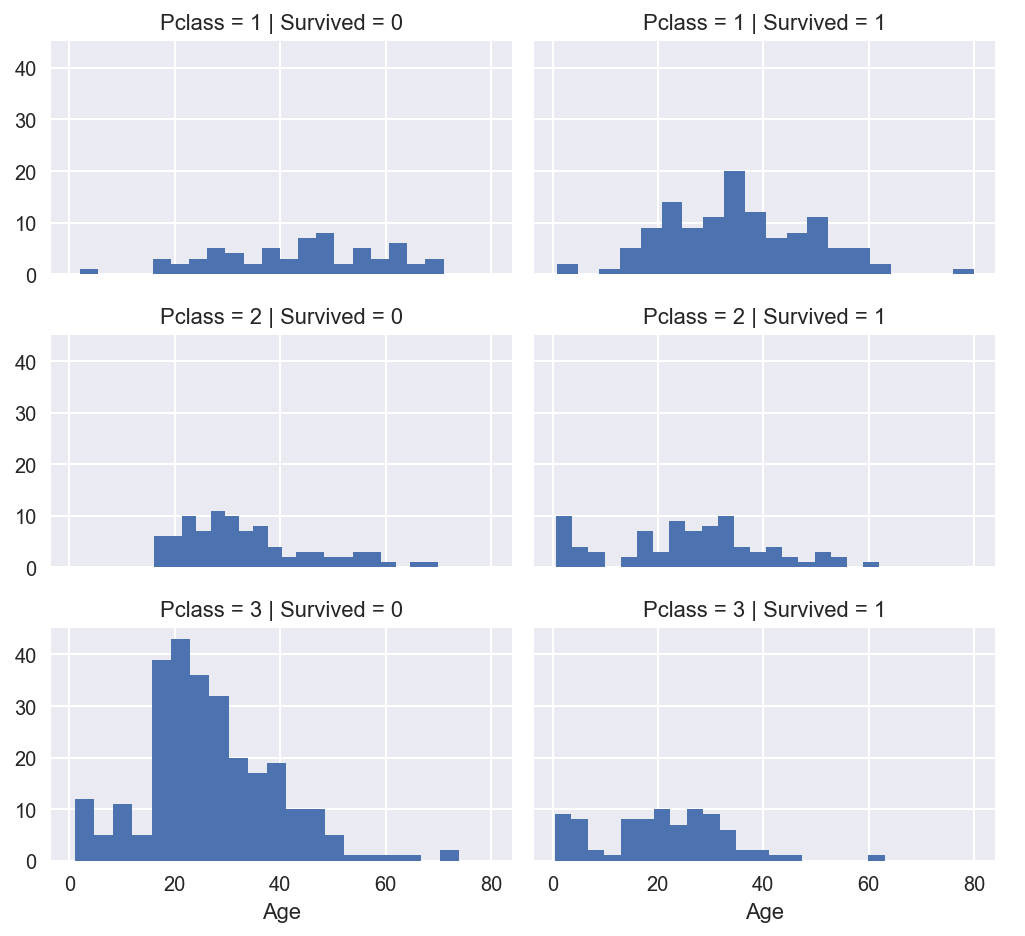

In [25]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

### Extracting features for modeling

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
Family_size    891 non-null int64
cabin_crew     891 non-null int64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
Master         891 non-null uint8
Miss           891 non-null uint8
Mr             891 non-null uint8
Mrs            891 non-null uint8
dtypes: float64(2), int64(7), object(6), uint8(9)
memory usage: 112.3

In [27]:
# Drop rows with nan
train_df_nona = train_df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Family_size", "cabin_crew",
                          "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", ]]
train_df_nona = train_df_nona.dropna()
train_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 17 columns):
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Family_size    714 non-null int64
cabin_crew     714 non-null int64
female         714 non-null uint8
male           714 non-null uint8
C              714 non-null uint8
Q              714 non-null uint8
S              714 non-null uint8
Master         714 non-null uint8
Miss           714 non-null uint8
Mr             714 non-null uint8
Mrs            714 non-null uint8
dtypes: float64(2), int64(6), uint8(9)
memory usage: 56.5 KB


### Correlation plot

* Survived is highly correlated to Sex (male and female)
* Mr is highly correlated to male
* Family_size is highly correlated to Sibsp and Parch

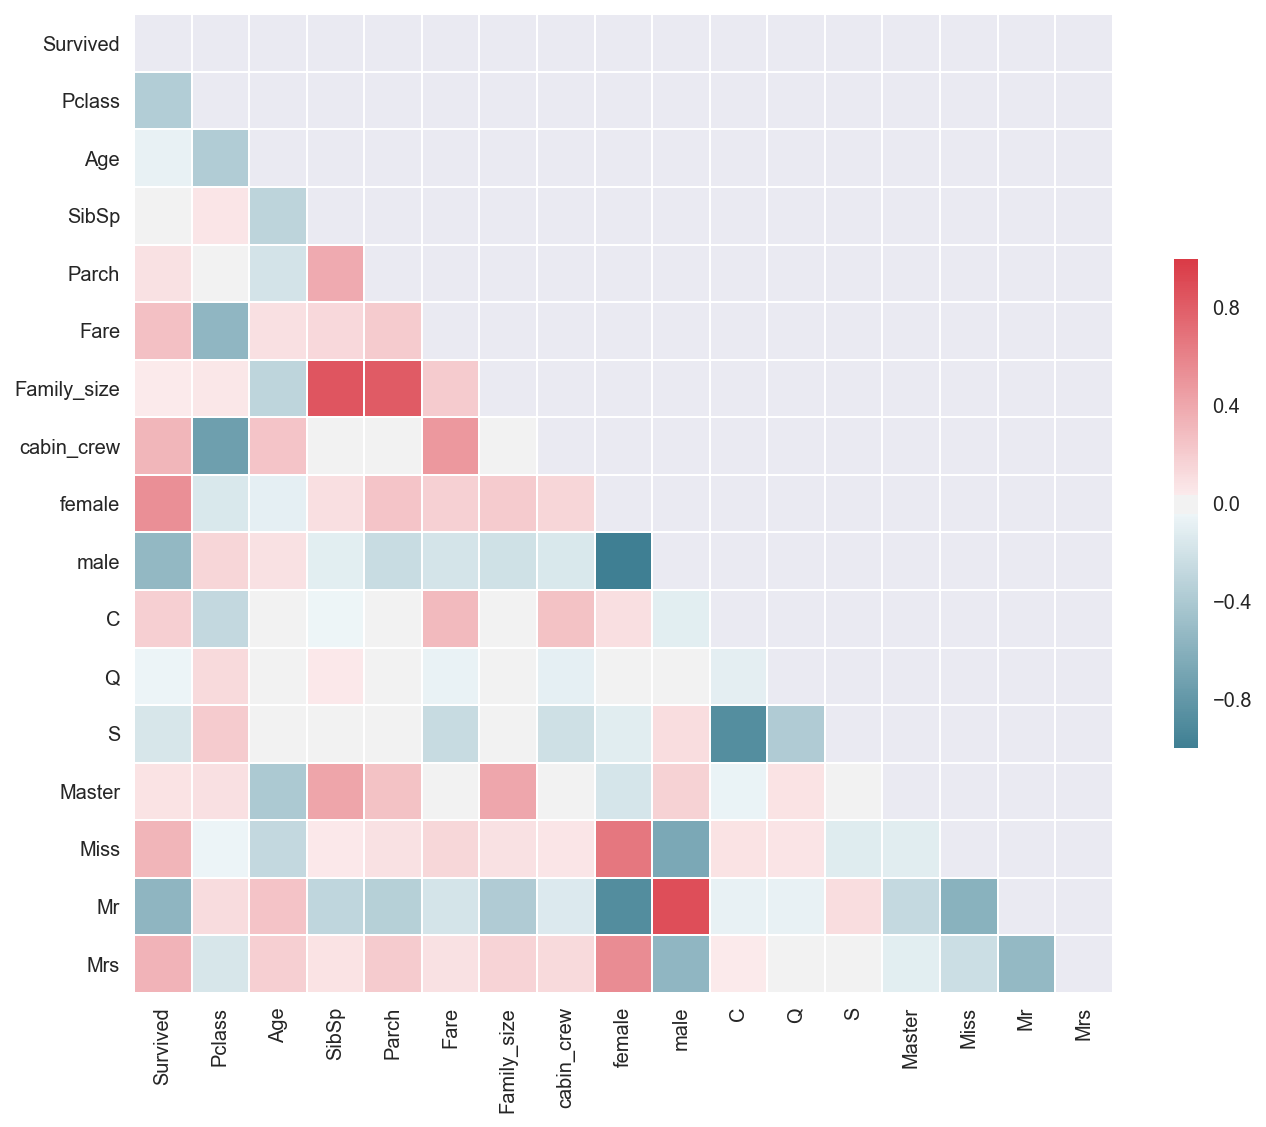

In [38]:
# Correlation plot
corr = train_df_nona.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
# Extract the numerical features
X = train_df_nona[["Pclass", "Age", "SibSp", "Parch", "Fare", "Family_size", "cabin_crew",
                       "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", ]]
y = train_df_nona["Survived"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 16 columns):
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Family_size    714 non-null int64
cabin_crew     714 non-null int64
female         714 non-null uint8
male           714 non-null uint8
C              714 non-null uint8
Q              714 non-null uint8
S              714 non-null uint8
Master         714 non-null uint8
Miss           714 non-null uint8
Mr             714 non-null uint8
Mrs            714 non-null uint8
dtypes: float64(2), int64(5), uint8(9)
memory usage: 50.9 KB


In [29]:
X = X.values
y = y.values

## 5. Model, predict, and solve the problem

Here, we use the following algorithms to build the models:

* Logistic regression
* Support vector machine
* Random Forest


Split the data into training and testing (validation) sets:

In [30]:
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

tuned_parameters = {'C': [0.1, 1.0, 10]}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1)
    clf.fit(X_train_transformed, y_train)

    print("Best parameters set found on development set:")
    print
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test_transformed)
    print(classification_report(y_true, y_pred))
    print


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1.0}

Grid scores on development set:

0.826 (+/-0.073) for {'C': 0.1}
0.827 (+/-0.077) for {'C': 1.0}
0.825 (+/-0.086) for {'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       137
          1       0.81      0.73      0.77        99

avg / total       0.81      0.81      0.81       236


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1.0}

Grid scores on development set:

0.821 (+/-0.067) for {'C': 0.1}
0.825 (+/-0.076) for {'C': 1.0}
0.823 (+/-0.082) for {'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

   

### Support vector machine

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


C = [1e1, 1e2, 1e3, 5e3]
gamma = [0.0001, 0.001, 0.01, 0.1]
tuned_parameters = [{'kernel':['linear'], 'C': C}, {'kernel':['rbf'], 'C':C, 'gamma': gamma }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'linear', 'C': 100.0}

Grid scores on development set:

0.813 (+/-0.079) for {'kernel': 'linear', 'C': 10.0}
0.825 (+/-0.092) for {'kernel': 'linear', 'C': 100.0}
0.814 (+/-0.080) for {'kernel': 'linear', 'C': 1000.0}
0.809 (+/-0.088) for {'kernel': 'linear', 'C': 5000.0}
0.694 (+/-0.051) for {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.0001}
0.771 (+/-0.089) for {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.001}
0.746 (+/-0.118) for {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.01}
0.702 (+/-0.128) for {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.1}
0.785 (+/-0.090) for {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.0001}
0.775 (+/-0.073) for {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.001}
0.731 (+/-0.119) for {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.01}
0.664 (+/-0.112) for {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.1}
0.816 (+/-0.094) for {'kernel': 'rbf', 'C': 1000.0, 'gamma': 0.0001}
0.802 (+/-0.073) for {'kernel':

### Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from operator import itemgetter

        
# build a classifier
clf_RF = RandomForestClassifier(n_estimators=20, random_state=0)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print

    clf = GridSearchCV(clf_RF, param_grid=param_grid, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_features': 10, 'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}

Grid scores on development set:

0.815 (+/-0.084) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.815 (+/-0.078) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.817 (+/-0.094) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.794 (+/-0.094) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.794 (+/-0.087) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.797 (+/-0.052) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.829 (+/-0.080) for {'max_features': 10, 'bootstra

Best parameters set found on development set:

{'max_features': 10, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

Grid scores on development set:

0.785 (+/-0.073) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.785 (+/-0.072) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.785 (+/-0.065) for {'max_features': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.789 (+/-0.092) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.790 (+/-0.084) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.792 (+/-0.055) for {'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.815 (+/-0.078) for {'max_features': 10, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3

### Feature importance

In [64]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250, random_state=0, max_features=10,
                                bootstrap=False, criterion='gini', max_depth=None, 
                                min_samples_leaf=10)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Family_size", "cabin_crew",
            "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", ]

# Print the feature ranking
print "Feature ranking:"

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Mr (0.380146)
2. feature Pclass (0.147189)
3. feature Age (0.111151)
4. feature female (0.105429)
5. feature male (0.099424)
6. feature Fare (0.065745)
7. feature Family_size (0.035633)
8. feature cabin_crew (0.015255)
9. feature SibSp (0.015099)
10. feature Miss (0.009505)
11. feature S (0.006036)
12. feature Mrs (0.003316)
13. feature Master (0.002550)
14. feature Parch (0.002098)
15. feature C (0.001423)
16. feature Q (0.000000)


(-1, 16)

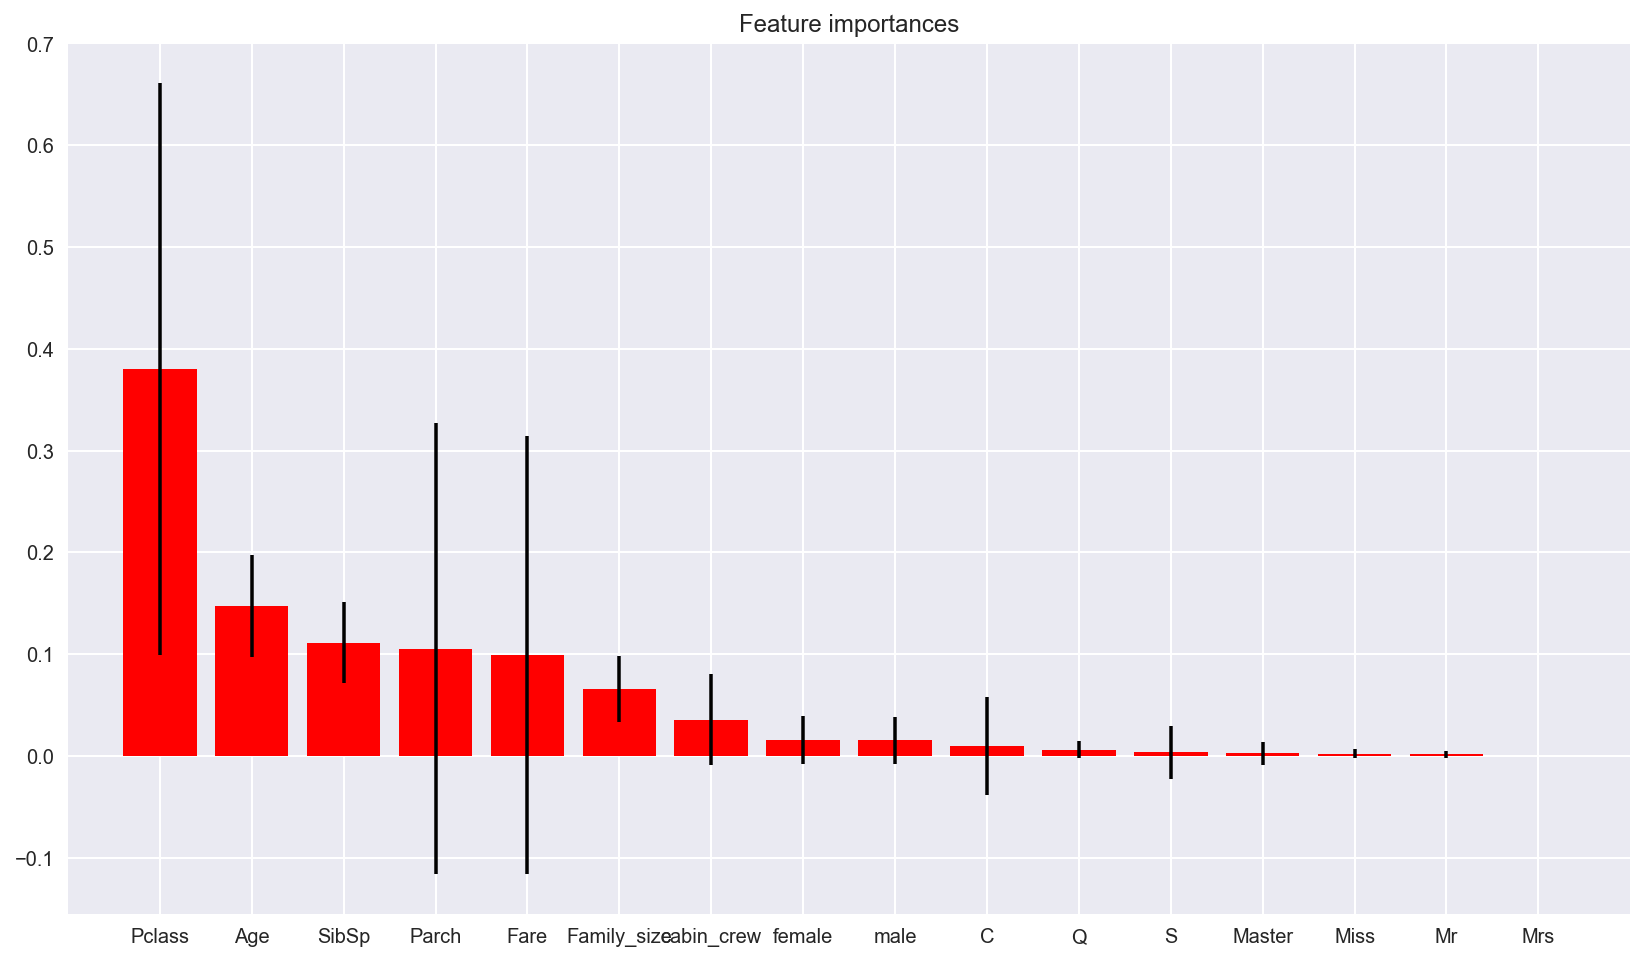

In [73]:
# Plot the feature importances of the forest
plt.figure(figsize=(14, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])

# Conclusion

No matter using which machine learning algorithms (logistic regression, support vector machine, random forest), the average evaluation scores are all the same, which means that I didn't find a best model for this dataset. 

We can find that the most important features that affact the suvival rate are *Pclass*, *Age*, *SibSp*, *Parch*, and *Fare*. This may indicate that people who are richer or people who have more family members on the boat would have higher chance to survive. However, it is a surpricing that the gender doesn't not play as one of the top important features on the list, since the survival rate between men and women is significant different.